# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [2]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

In [3]:
df = pd.read_csv("Datasets/kidney_disease.csv", header = 0, index_col = 0, na_values = "?")
# wrangling
import re
df["pcv"] = df.pcv.apply(lambda x: re.sub("[^0-9]", "", str(x)))
df["wc"] = df.wc.apply(lambda x: re.sub("[^0-9]", "", str(x)))
df["rc"] = df.rc.apply(lambda x: re.sub("[^0-9]", "", str(x)))
df["dm"] = df.dm.apply(lambda x: re.sub("[\t]", "", str(x)))
df["dm"] = df.dm.apply(lambda x: re.sub("[ ]", "", str(x)))
df["cad"] = df.cad.apply(lambda x: re.sub("[\t]", "", str(x)))

df["pcv"] = pd.to_numeric(df.pcv, errors = "raise")
df["wc"] = pd.to_numeric(df.wc, errors = "raise")
df["rc"] = pd.to_numeric(df.rc, errors = "raise")

df = df.dropna(axis = 0)

In [4]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [6]:
indexer = df.drop(labels = ['classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1)
indexer.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
wc      float64
rc      float64
dtype: object

In [7]:
indexer.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,48.689873
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,10.779730
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,4.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,45.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,49.500000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,56.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,80.000000


In [8]:
indexer.var()

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
pcv     8.290402e+01
wc      9.777380e+06
rc      1.162026e+02
dtype: float64

In [9]:
# .. your (possible) code adjustment here ..
if scaleFeatures: indexer = scaleFeaturesDF(indexer)

In [10]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components = 2, svd_solver = "full")
pca.fit(indexer)
T = pca.transform(indexer)

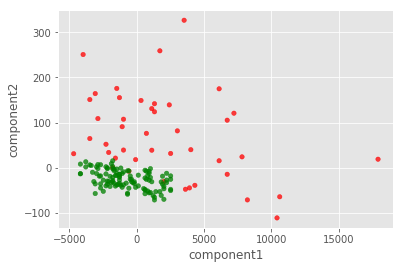

In [12]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, indexer.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [13]:
indexer.var()

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
pcv     8.290402e+01
wc      9.777380e+06
rc      1.162026e+02
dtype: float64

In [14]:
pd.DataFrame(T).describe()

,component1,component2
count,1.580000e+02,1.580000e+02
mean,8.490536e-14,1.489666e-15
std,3.126921e+03,6.712619e+01
min,-4.675816e+03,-1.116845e+02
25%,-1.951091e+03,-3.727218e+01
50%,-6.762537e+02,-1.853172e+01
75%,1.298710e+03,5.653695e+00
max,1.792436e+04,3.269945e+02


In [15]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [16]:
indexer = df.drop(labels = ['classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1)
indexer.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
wc      float64
rc      float64
dtype: object

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   1.032929e-16  7.406171e-16 -1.624580e-15 -7.757508e-16 -2.108018e-18   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

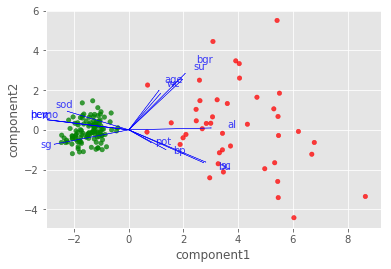

In [17]:
# .. your (possible) code adjustment here ..
if scaleFeatures: indexer = scaleFeaturesDF(indexer)
    
from sklearn.decomposition import PCA
    
pca = PCA(n_components = 2, svd_solver = "full")
pca.fit(indexer)
T = pca.transform(indexer)

# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, indexer.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [19]:
indexer = df.drop(labels = ['classification'], axis = 1)
indexer.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [29]:
new_Indexer = pd.get_dummies(indexer, prefix =  ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

In [31]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

labels = ['red' if i=='ckd' else 'green' for i in df.classification]

new_Indexer.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,...,0.822785,0.177215,0.930380,0.069620,0.879747,0.120253,0.873418,0.126582,0.898734,0.101266
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,...,0.383065,0.383065,0.255315,0.255315,0.326292,0.326292,0.333562,0.333562,0.302640,0.302640
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
new_Indexer.var()

age               2.406297e+02
bp                1.248891e+02
sg                3.023865e-05
al                1.996936e+00
su                6.616141e-01
bgr               4.217182e+03
bu                2.246322e+03
sc                9.471717e+00
sod               5.609143e+01
pot               1.208501e+01
hemo              8.307100e+00
pcv               8.290402e+01
wc                9.777380e+06
rc                1.162026e+02
rbc_abnormal      1.015883e-01
rbc_normal        1.015883e-01
pc_abnormal       1.508103e-01
pc_normal         1.508103e-01
pcc_notpresent    8.127066e-02
pcc_present       8.127066e-02
ba_notpresent     7.062807e-02
ba_present        7.062807e-02
htn_no            1.699589e-01
htn_yes           1.699589e-01
dm_no             1.467387e-01
dm_yes            1.467387e-01
cad_no            6.518584e-02
cad_yes           6.518584e-02
appet_good        1.064662e-01
appet_poor        1.064662e-01
pe_no             1.112634e-01
pe_yes            1.112634e-01
ane_no  

In [33]:
# .. your (possible) code adjustment here ..
if scaleFeatures: new_Indexer = scaleFeaturesDF(new_Indexer)

In [34]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components = 2, svd_solver = "full")
pca.fit(new_Indexer)
T = pca.transform(new_Indexer)

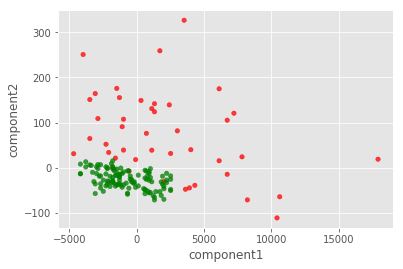

In [35]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, indexer.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [36]:
new_Indexer.var()

age               2.406297e+02
bp                1.248891e+02
sg                3.023865e-05
al                1.996936e+00
su                6.616141e-01
bgr               4.217182e+03
bu                2.246322e+03
sc                9.471717e+00
sod               5.609143e+01
pot               1.208501e+01
hemo              8.307100e+00
pcv               8.290402e+01
wc                9.777380e+06
rc                1.162026e+02
rbc_abnormal      1.015883e-01
rbc_normal        1.015883e-01
pc_abnormal       1.508103e-01
pc_normal         1.508103e-01
pcc_notpresent    8.127066e-02
pcc_present       8.127066e-02
ba_notpresent     7.062807e-02
ba_present        7.062807e-02
htn_no            1.699589e-01
htn_yes           1.699589e-01
dm_no             1.467387e-01
dm_yes            1.467387e-01
cad_no            6.518584e-02
cad_yes           6.518584e-02
appet_good        1.064662e-01
appet_poor        1.064662e-01
pe_no             1.112634e-01
pe_yes            1.112634e-01
ane_no  

In [37]:
pd.DataFrame(T).describe()

,component1,component2
count,1.580000e+02,1.580000e+02
mean,4.518692e-13,2.771342e-15
std,3.126921e+03,6.713051e+01
min,-4.675816e+03,-1.116742e+02
25%,-1.951091e+03,-3.727611e+01
50%,-6.762538e+02,-1.853861e+01
75%,1.298710e+03,5.648955e+00
max,1.792436e+04,3.269787e+02


In [38]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [39]:
indexer = df.drop(labels = ['classification'], axis = 1)
indexer.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [40]:
new_Indexer = pd.get_dummies(indexer, prefix =  ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

In [41]:
new_Indexer.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

New Variances:
 age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64
New Describe:
                 age            bp   

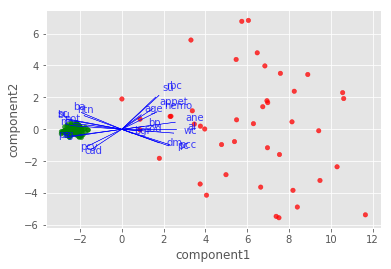

In [42]:
# .. your (possible) code adjustment here ..
if scaleFeatures: new_Indexer = scaleFeaturesDF(new_Indexer)
    
from sklearn.decomposition import PCA
    
pca = PCA(n_components = 2, svd_solver = "full")
pca.fit(new_Indexer)
T = pca.transform(new_Indexer)

# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, indexer.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()